In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_json('/Users/lukin/Downloads/challenge 2.json')

In [5]:
df.describe()

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,sales_channel,segment_code,seller_code,total_price,unit_price
count,204428.0,204428.000000,204428.000000,202513.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000
mean,0.0,447.489062,0.307184,0.191168,1437.298981,304.048244,12434.088863,12.332694,1.761182,0.846381,145.543022,5337.072931,47.456664
std,0.0,246.678026,0.714639,0.393222,903.166319,1009.268287,6935.623011,53.299314,2.929541,1.615763,75.197609,21268.855032,145.295694
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.010000
25%,0.0,221.000000,0.000000,0.000000,631.000000,79.600000,6497.750000,3.000000,0.000000,0.000000,83.000000,1180.470000,14.670000
50%,0.0,486.000000,0.000000,0.000000,1455.000000,156.150000,12698.000000,6.000000,0.000000,0.000000,156.000000,2035.820000,21.780000
75%,0.0,651.000000,0.000000,0.000000,2048.000000,293.862500,18280.000000,12.000000,2.000000,2.000000,195.000000,3611.070000,46.720000
max,0.0,837.000000,3.000000,1.000000,2980.000000,102951.110000,24617.000000,7000.000000,105.000000,7.000000,289.000000,428976.460000,26280.000000


In [7]:
pd.value_counts(df['is_churn'].values, sort=False)

0.0    163799
1.0     38714
dtype: int64

In [13]:
df.info() #only churn describing parameter has NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
branch_id           204428 non-null int64
customer_code       204428 non-null int64
group_code          204428 non-null int64
is_churn            202513 non-null float64
item_code           204428 non-null int64
item_total_price    204428 non-null float64
order_id            204428 non-null int64
quantity            204428 non-null int64
register_date       204428 non-null object
sales_channel       204428 non-null int64
segment_code        204428 non-null int64
seller_code         204428 non-null int64
total_price         204428 non-null float64
unit_price          204428 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 21.8+ MB


In [15]:
df.dropna(inplace=True) #delete rows with NaN values

In [16]:
features=['item_total_price', 'quantity', 'unit_price', 'segment_code', 'seller_code', 'total_price']
X=df[features]
Y=df['is_churn']

In [17]:
from matplotlib import pyplot as plt


In [18]:
from inspect import signature
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [20]:
def plot_confusion_matrix(Y_test, Y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    # Only use the labels that appear in the data
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # also label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)



In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33) #Training to Test ration will be 2:1

In [24]:
Y_test.sum()

12773.0

Confusion matrix, without normalization
[[52485  1572]
 [ 6003  6770]]
Normalized confusion matrix
[[0.97 0.03]
 [0.47 0.53]]


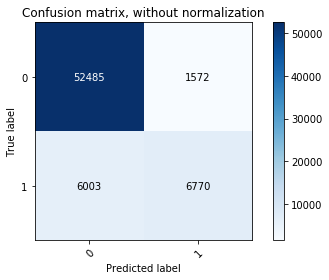

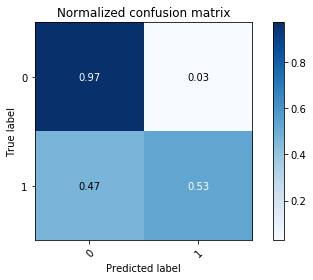

In [23]:
class_names=['0', '1']
from sklearn.neighbors import KNeighborsClassifier #knn for multiple features
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, Y_train) 
Y_pred=neigh.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[52466  1591]
 [ 3443  9330]]
Normalized confusion matrix
[[0.97 0.03]
 [0.27 0.73]]


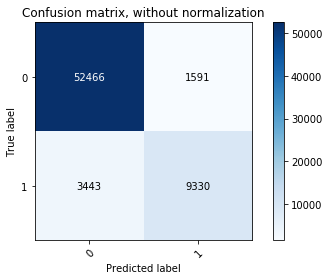

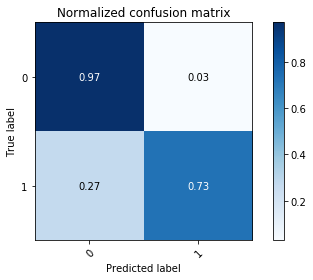

In [25]:
from sklearn import tree #decision tree alghorithm
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')
clf = clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



Confusion matrix, without normalization
[[53739   318]
 [ 2009 10764]]
Normalized confusion matrix
[[0.99 0.01]
 [0.16 0.84]]


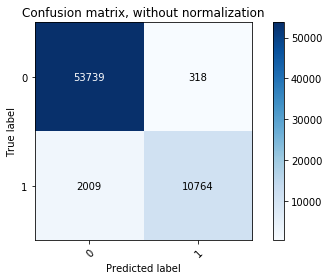

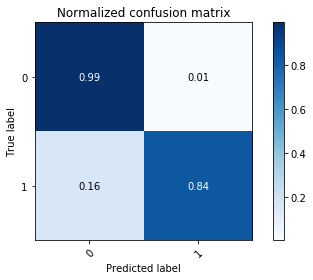

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0) #maximum tree depth will be a tunable hyperparameter here
rf = rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



Confusion matrix, without normalization
[[53931   126]
 [ 1001 11772]]
Normalized confusion matrix
[[1.   0.  ]
 [0.08 0.92]]


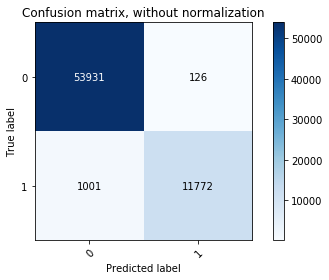

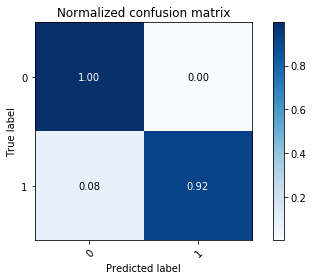

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0) #change maximum depth from 10 to 20
rf = rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[53896   161]
 [  814 11959]]
Normalized confusion matrix
[[1.   0.  ]
 [0.06 0.94]]


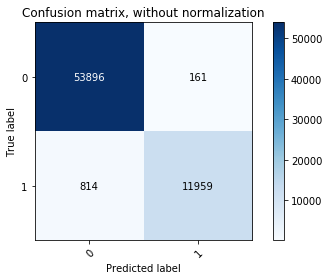

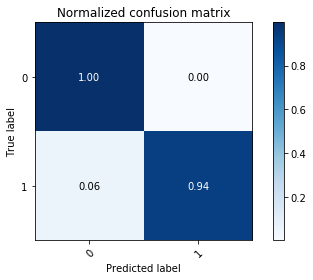

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=60, random_state=0) #change maximum depth from 10 to 60
rf = rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[53896   161]
 [  814 11959]]
Normalized confusion matrix
[[1.   0.  ]
 [0.06 0.94]]


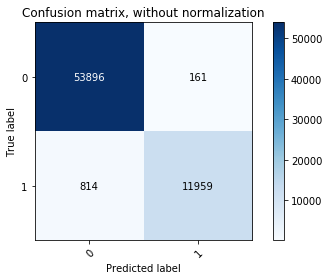

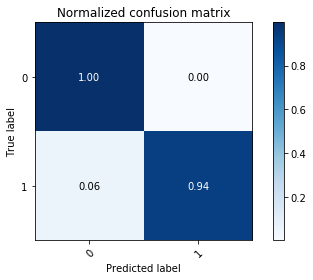

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0) #change maximum depth from 10 to 100
rf = rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[53818   239]
 [  951 11822]]
Normalized confusion matrix
[[1.   0.  ]
 [0.07 0.93]]


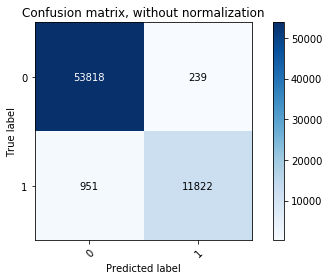

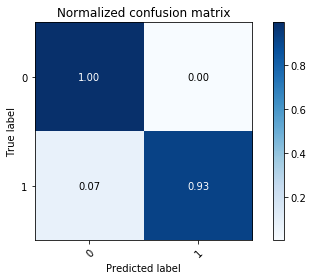

In [35]:
from sklearn import ensemble
params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5} #maximum leaf nodes will be a tunable hyperparameter here
gbr = ensemble.GradientBoostingClassifier(**params) #gradient boosting to improve decision trees
gbr = gbr.fit(X_train, Y_train)  
Y_pred=gbr.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[53946   111]
 [  250 12523]]
Normalized confusion matrix
[[1.   0.  ]
 [0.02 0.98]]


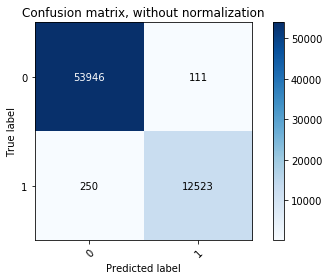

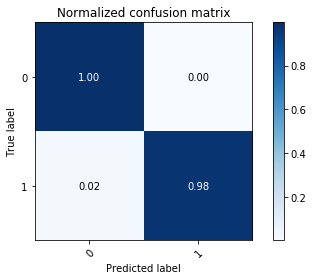

In [36]:
params = {'n_estimators': 1000, 'max_leaf_nodes': 16, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5} #multiply maximum leaf nodes 4 times
gbr = ensemble.GradientBoostingClassifier(**params)
gbr = gbr.fit(X_train, Y_train)  
Y_pred=gbr.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[53999    58]
 [  153 12620]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


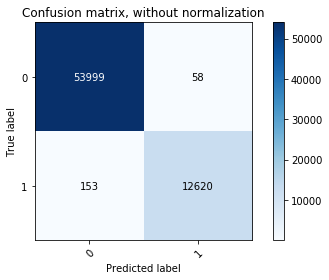

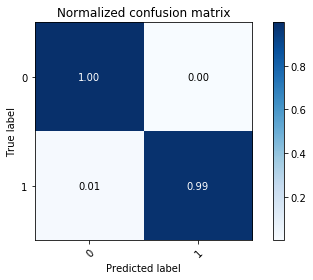

In [37]:
params = {'n_estimators': 1000, 'max_leaf_nodes': 64, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5} #multiply maximum leaf nodes 16 times
gbr = ensemble.GradientBoostingClassifier(**params)
gbr = gbr.fit(X_train, Y_train)  
Y_pred=gbr.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[53996    61]
 [  133 12640]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


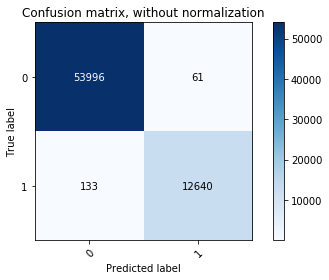

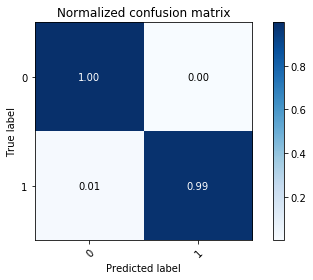

In [38]:
params = {'n_estimators': 1000, 'max_leaf_nodes': 128, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5} #multiply maximum leaf nodes 32 times
gbr = ensemble.GradientBoostingClassifier(**params)
gbr = gbr.fit(X_train, Y_train)  
Y_pred=gbr.predict(X_test) 
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(Y_test, Y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show() #actually the best model in this set